In [3]:
# Ler o arquivo CSV
import pandas as pd

fibrose = pd.read_csv(r"C:\Users\steph\Downloads\basefibrose.csv", encoding='latin1', sep = ";")
fibrose.head()

,ID,Sexo,Etnia,Idade,IMC,Circuferenciaa_Abdominal,GRAU_FIBROSE,Fibroscan,Fibroscan.IQR
0,1,Masculino,caucasiana,63,"22,2",98,F1,"6,3",10
1,2,Masculino,caucasiana,59,"26,7",101,F2,"7,7",13
2,3,Masculino,afrodescendente,45,"25,2",92,F0,"4,8",25
3,4,Masculino,caucasiana,30,"18,5",72,F2,"9,5",13
4,5,Feminino,caucasiana,56,"21,2",90,F1,"6,4",30


In [4]:
fibrose.describe()

,ID,Idade,Circuferenciaa_Abdominal,Fibroscan.IQR
count,107.000000,107.000000,107.000000,107.000000
mean,54.000000,48.130841,92.785047,15.084112
std,31.032241,10.799270,7.634366,6.514312
min,1.000000,21.000000,72.000000,3.000000
25%,27.500000,41.500000,87.000000,10.000000
50%,54.000000,50.000000,93.000000,15.000000
75%,80.500000,57.000000,98.000000,19.000000
max,107.000000,69.000000,111.000000,30.000000


<span style="color:yellow"><strong>
idade
 
idade media: 48 anos

desvio padrao: 10,8 anos (idade deles variam em torno disso em relacao a media)

valor min: paciente mais jovem tem 21 anos

25%: 25% dos pacientes têm 41,5 anos ou menos

50% (mediana): metade dos pacientes é mais jovem e metade é mais velha 50 anos

75%: 75% dos pctes tem ate 57 anos

valor max: o paciente mais velho tem 69 anos

<span style="color:green"><strong>
IMC

IMC médio: 25,05 - um pouco acima da faixa considerada normal

STD: IMC variando 2,85 em relação à média

valor min: menor imc é 18,4 - abaixo do peso

25%: 25% deles tem imc 22,9 ou abaixo

50% (mediana): 25,3, o que indica que metade está acima e metade abaixo

75%: 75% tem imc até 27,25 

valor max: maior imc é 29,8 - proximo a obesidade

<span style="color:red"><strong>
circuferencia abd

circuferencia média: 92,79cm

STD: variando 7,63cm em relação à média

valor min: menor é 72cm 

25%: 25% deles tem 87cm ou menos

50% (mediana): 93cm

75%: 75% tem circ até 98cm

valor max: maior circ é 111 


fibroscan.iqr

fibroscan.iqr médio: 15,08

STD: variando 6,51 em relação à média

valor min: menor é 3 

25%: 25% deles tem 10,00 de variabilidade

50% (mediana): 15

75%: 75% tem até 19

valor max: 30

In [5]:
# converter as colunas numericas pro formato correto
fibrose['IMC'] = fibrose['IMC'].str.replace(',', '.').astype(float)
fibrose['Circuferenciaa_Abdominal'] = fibrose['Circuferenciaa_Abdominal'].astype(float)
fibrose['Fibroscan'] = fibrose['Fibroscan'].str.replace(',', '.').astype(float)
fibrose['Fibroscan.IQR'] = fibrose['Fibroscan.IQR'].astype(float)

fibrose_estatistica = fibrose[['Idade', 'IMC', 'Circuferenciaa_Abdominal', 'Fibroscan', 'Fibroscan.IQR']].describe()

fibrose_estatistica


,Idade,IMC,Circuferenciaa_Abdominal,Fibroscan,Fibroscan.IQR
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,48.130841,25.046729,92.785047,7.373832,15.084112
std,10.799270,2.845596,7.634366,5.009187,6.514312
min,21.000000,18.400000,72.000000,3.000000,3.000000
25%,41.500000,22.900000,87.000000,4.800000,10.000000
50%,50.000000,25.300000,93.000000,6.100000,15.000000
75%,57.000000,27.250000,98.000000,7.900000,19.000000
max,69.000000,29.800000,111.000000,36.300000,30.000000


In [6]:
# Calculando a distribuição absoluta e relativa para variáveis categóricas
categ = ['Sexo', 'Etnia', 'GRAU_FIBROSE']
distribuicao = {}

for col in categ:
    absolute_freq = fibrose[col].value_counts()
    relative_freq = fibrose[col].value_counts(normalize=True) * 100
    distribuicao[col] = pd.DataFrame({
        'Frequência Absoluta': absolute_freq,
        'Frequência Relativa (%)': relative_freq
    })

# Exibindo a distribuição
for col, dist in distribuicao.items():
    print(f"\nDistribuição de {col}:\n", dist)



Distribuição de Sexo:
            Frequência Absoluta  Frequência Relativa (%)
Sexo                                                   
Feminino                    54                 50.46729
Masculino                   53                 49.53271

Distribuição de Etnia:
                  Frequência Absoluta  Frequência Relativa (%)
Etnia                                                        
caucasiana                        72                67.289720
afrodescendente                   34                31.775701
asiática                           1                 0.934579

Distribuição de GRAU_FIBROSE:
               Frequência Absoluta  Frequência Relativa (%)
GRAU_FIBROSE                                              
F1                             43                40.186916
F2                             31                28.971963
F3                             23                21.495327
F0                              8                 7.476636
F4                             

<span style="color:YELLOW"><strong>ANÁLISE

1. distribuição entre FEM e MASC tá equilibrado

2. maioria caucasiana

3. maioria está com F1

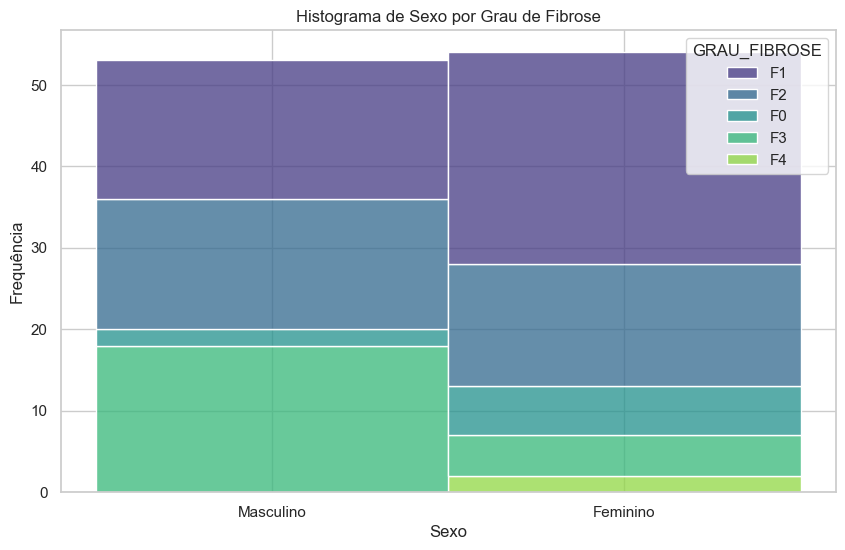

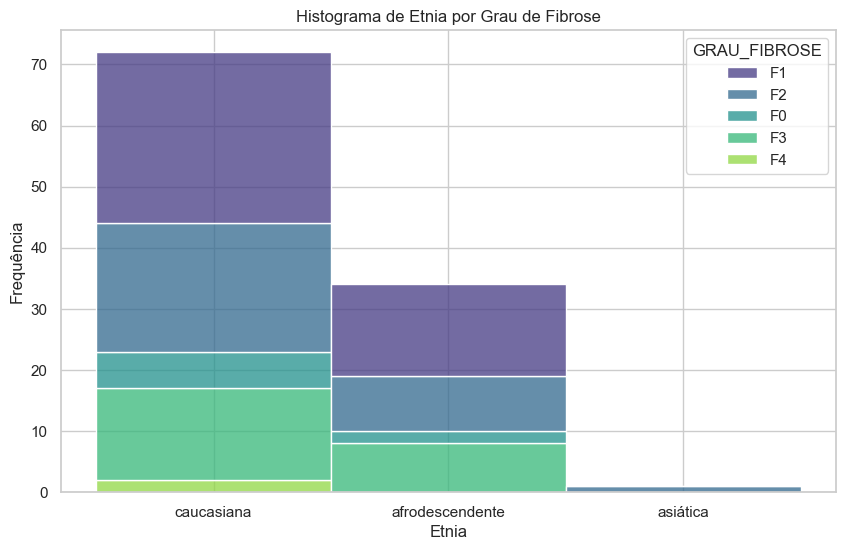

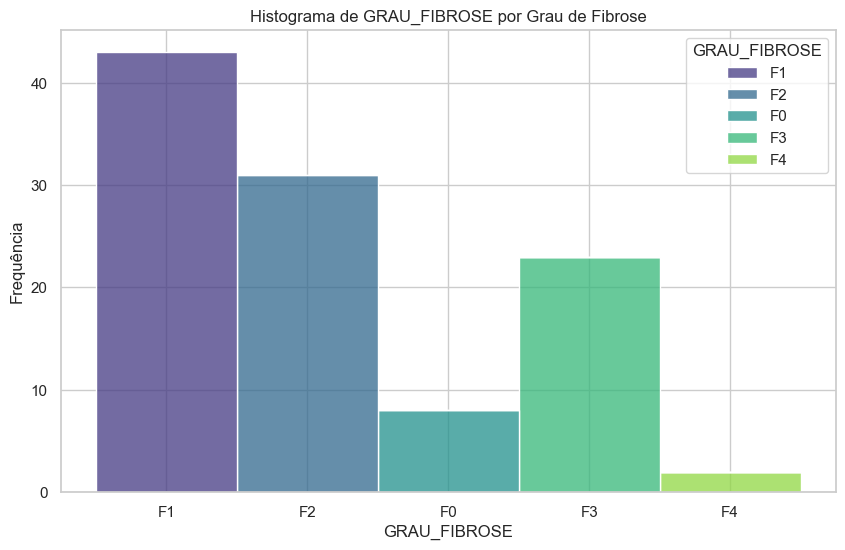

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o histograma de cada variável contínua por Grau de Fibrose
continuos = ['Idade', 'IMC', 'Circuferenciaa_Abdominal', 'Fibroscan', 'Fibroscan.IQR']

for col in categ:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=fibrose, x=col, hue='GRAU_FIBROSE', multiple='stack', palette='viridis', kde=False)
    plt.title(f'Histograma de {col} por Grau de Fibrose')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()
